# Delaware Test Scores: Charter Schools, Income Level, and Racial Equity
By Megan Englert

[Elevator Pitch!](https://youtu.be/zliwlCADFq0)

### The Problem
Charter schools are both prevalent and heavily debated in Delaware. While it makes sense that parents want to be able to choose their child's education, there are not enough charter schools to meet demand right now. Do parents really get to "choose" when they are reliant on their student's scores or a random lottery to be able to actually make that choice? Many people protest charter schools, however, arguing that the per-student funding lost from public schools makes a difference. A few students per grade leaving results in lost funding in many states, but does not decrease the cost of faculty or maintaining the building.

But here's an important question: *Do charter schools actually make a difference?* This report will consider the percentage proficiency from different districts on the Smarter Balanced Standardized Assessment, a common assessment in Delaware meant to measure students' progress. The two datasets used in this report were both collected by the Delaware Depertment of Education. One contains [test data](https://data.delaware.gov/Education/Student-Assessment-Performance/ms6b-mt82), while [the other](https://data.delaware.gov/Education/Delaware-Public-Education-Organization-Directory/p3ez-si4g) will be used to obtain each school's "District Type" for charter vs. non-charter public.

### Justification 
A 2014 publication by the Economic Policy Institute, [Richard Rothstein's "The Racial Achievement Gap, Segregated Schools, and Segregated Neighborhoods - A Constitutional Insult"](https://www.epi.org/publication/the-racial-achievement-gap-segregated-schools-and-segregated-neighborhoods-a-constitutional-insult/), analyzes the factors of race and income level that play into educational success. Rothstein considers both factors outside the classroom, such as worse health care causing absences, less educated parents, and fewer opportunities for enrichment outside of school, and inside it, like how higher student mobility results in repeated lessons and the requirement for more remediation leaving excelling students left behind. Furthermore, these students' lesser successes in education result in lower expected income, dooming their children to a similar future unless this inequality is resolved.

Rothstein cites statistics found by NYU sociologist Patrick Sharkey in 2013:
> "Sharkey finds that young African Americans (from 13 to 28 years old) are now ten times as likely to live in poor neighborhoods, defined in this way, as young whites—66 percent of African Americans, compared to 6 percent of whites (Sharkey, 2013, p. 27, Fig. 2.1). What’s more, for black families, mobility out of such neighborhoods is much more limited than for whites. Sharkey shows that 67 percent of African American families hailing from the poorest quarter of neighborhoods a generation ago continue to live in such neighborhoods today. But only 40 percent of white families who lived in the poorest quarter of neighborhoods a generation ago still do so (Sharkey, 2013, p. 38, Fig. 2.6)" (Rothstein).

These educational disparities play strongly into the cycle of poverty, especially for non-white students, who often have a more difficult time overcoming their circumstances due to biased employers and educational institutions. 

The choice and opportunity to attend charter schools could similarly impact students' ability to achieve. [Zachary Jason's The Battle Over Charter Schools](https://www.gse.harvard.edu/news/ed/17/05/battle-over-charter-schools), published in Harvard Ed. Magazine in Summer 2017, analyzes both side's thoughts. At the time of writing, 32,000 children, with a majority Black and Latino population, were on waitlists for existing charter schools, seeking access to a better education than a public school could offer (Jason). Not all charter schools are created equal; 200 close each year, sometimes in the middle of a school year or even school day, and one was caught being used as an illegal nightclub on the weekends (Jason). Jason also cites charter schools' high teacher turnover rate, 24 percent, double that of traditional schools, which could potentially stifle student success (Jason). However, if implemented properly, charter schools could help motivated students and families to find a better education.

While charter schools are struggling to pass legislation in some states (Jason), [the National Alliance for Public Charter Schools](https://www.publiccharters.org/our-work/charter-law-database/states/delaware) recorded 16,086 DE charter students in the 2018-2019 school year, accounting for 13% of the total public school enrollment. Furthermore, Delaware is ranked 15th by the NAPCS for its public charter laws, since it "provides a fair amount of autonomy and accountability to its public charter schools, but it provides inequitable funding to charter schools" ("Delaware").

### Ethical Concerns

- **Causation Assumptions**: 
    - **Race and Income Level**: Analysis of this data may show that students of certain races or income levels tend to get better or worse test scores. If analysis is made implying a direct causation, it implies that these students are simply incapable of getting comparable test scores instead of experiencing environmental factors that affect their results. In my analysis, it must be made clear any association found is likely a result of the many explanations offered by Rothstein, such as worse support at home and worse funding.
    - **Charter Schools**: Furthermore, this analysis may also show that students in charter schools tend to perform better or worse than students in traditional schools. This may also be caused by a myriad of factors, especially considering that some charter schools use merit-based admission. They may also be experiencing better educational support at home, since their parents went through the effort to actively change their school. While the data may show that either traditional or charter schooling is better for test scores, it may simply be the factors surrounding who is currently able to access charter schools.
- **Funding**:
    - **Race and Income Level**: Rather than trying to distribute funding so that all can access education equally, some may argue that schools receiving better test scores should continue to get more funding to give their high-achieving students more opportunities to succeed in different areas. Money spent on remediation is not spent on advancement, and a more utilitarian argument may see value in leaving students in the educational dust while others receive even more opportunities.
    - **Charter Schools**: Continuing with the idea of causation, because of the way that charter school students are selected, there may be many outside factors causing a difference in scores. Furthermore, even if they are beneficial, they may not be the one-size-fits-all solution. For example, one cost of charter schools is the variety of programs offered. If 1 in 25 students are interested in playing in a music ensemble or taking a certain specialized course, a 1,000 student public school could easily justify the cost of providing facilities and a teacher. A 200 person charter school, however, would still have to find a teacher and facilities for those 8 students, and they can't simply pay the teacher 1/5 of a salary for teaching 1/5 of the students. The further breakdown of traditional schools into charter schools has likely not been studied well enough to try to successfully implement on a state-wide level.

## Data Pre-Processing

In [4]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#Importing data
data1 = pd.read_csv("C:\\Users\\megan\\Desktop\\CISC367\\Datasets\\Student_Assessment_Performance.csv")
data2 = pd.read_csv("C:\\Users\\megan\\Desktop\\CISC367\\Datasets\\Delaware_Public_Education_Organization_Directory.csv")

# Merging datasets to get district type for each district
data1.head()
types = data2[["District Code","District Type"]]
types = types.drop_duplicates()
combined = pd.merge(types, data1)
# Dropping non-standard and non-charter schools since we are not considering them
combined = combined[combined['District Type']!= "Not Applicable"]
combined.head()

,District Code,District Type,School Year,District,School Code,Organization,Assessment Name,ContentArea,Race,Gender,Grade,SpecialDemo,Geography,SubGroup,RowStatus,Tested,Proficient,PctProficient,ScaleScoreAvg
3646,10,Regular,2015,Caesar Rodney School District,0,Caesar Rodney School District,DCAS Alternate Assessment,ELA,Hispanic/Latino,All Students,3rd Grade,All Students,All Students,Hispanic/Latino/3rd Grade,REDACTED,NaN,NaN,NaN,NaN
3647,10,Regular,2015,Caesar Rodney School District,0,Caesar Rodney School District,DCAS Alternate Assessment,ELA,Hispanic/Latino,All Students,4th Grade,All Students,All Students,Hispanic/Latino/4th Grade,REDACTED,NaN,NaN,NaN,NaN
3648,10,Regular,2015,Caesar Rodney School District,0,Caesar Rodney School District,DCAS Alternate Assessment,ELA,Hispanic/Latino,All Students,5th Grade,All Students,All Students,Hispanic/Latino/5th Grade,REDACTED,NaN,NaN,NaN,NaN
3649,10,Regular,2015,Caesar Rodney School District,0,Caesar Rodney School District,DCAS Alternate Assessment,ELA,Hispanic/Latino,All Students,6th Grade,All Students,All Students,Hispanic/Latino/6th Grade,REDACTED,NaN,NaN,NaN,NaN
3650,10,Regular,2015,Caesar Rodney School District,0,Caesar Rodney School District,DCAS Alternate Assessment,ELA,Hispanic/Latino,All Students,7th Grade,All Students,All Students,Hispanic/Latino/7th Grade,REDACTED,NaN,NaN,NaN,NaN


## Percentage Proficiency

This report is based on the percentage proficient reported for each age group in each demographic. This percentage reflects the number of students who have met or exceeded state standards. The following graph shows the distribution of percent proficient for all students across all districts in DE for the year 2019.

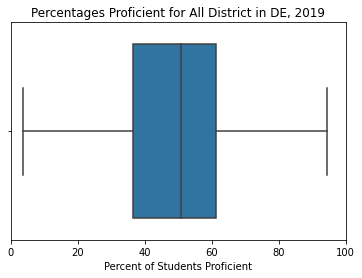

count    340.000000
mean      48.798147
std       18.530959
min        3.680000
25%       36.477500
50%       50.840000
75%       61.312500
max       94.580000
Name: PctProficient, dtype: float64

In [14]:
df_overall = combined[(combined.SubGroup == 'All Students') & 
                      (combined['Assessment Name'] == 'Smarter Balanced Summative Assessment') & 
                      (combined.RowStatus == 'REPORTED') & 
                      (combined['School Year'] == 2019)]
df = df_overall
sns.boxplot(x = 'PctProficient',
           data = df).set(xlim=(0,100))
plt.title("Percentages Proficient for All District in DE, 2019")
plt.xlabel("Percent of Students Proficient")
plt.show()
df.PctProficient.describe()

As we can see, the percentage of proficient students in each district varied extremely greatly, from 3.68% to 94.58%.

## Charter Schools
Now, we will compare regular schools to charter school scores.

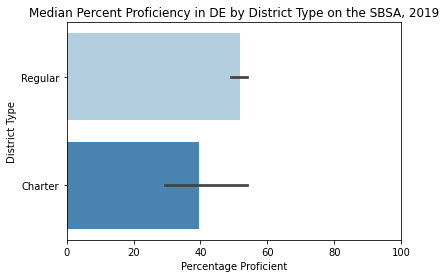

In [18]:
sns.barplot(y = 'District Type',
           x = 'PctProficient',
           data = df,
           palette = 'Blues',
           estimator = np.median).set(xlim=(0,100))
plt.title("Median Percent Proficiency in DE by District Type on the SBSA, 2019")
plt.ylabel("District Type")
plt.xlabel("Percentage Proficient")
plt.show()

Now we will test to see if the difference is as pronounced as it appears.

In [22]:
df_reg = df[df["District Type"] == "Regular"]
df_charter = df[df["District Type"] == "Charter"]
test_stat, p = stats.ttest_ind(df_reg.PctProficient, df_charter.PctProficient)
print("Difference between two independent T's for charter vs. non-charter: ", test_stat, p, p < 0.05)
print("There is no statistically signficant difference in the Percentage Proficient for Charter vs Non-Charter schools on the SBSA.")

Difference between two independent T's for charter vs. non-charter:  1.918579093783365 0.05587968932075212 False
There is no statistically signficant difference in the Percentage Proficient for Charter vs Non-Charter schools on the SBSA.


## Low-Income Students
Since the original dataset does not separate non-low-income students from the population, we technically are unable to make good comparisons with low-income students against the rest of the population. While this is technically incorrect, it is the best we have for now. If anything, it is possible that there may actually be a larger difference, since one of the datasets contains the other.

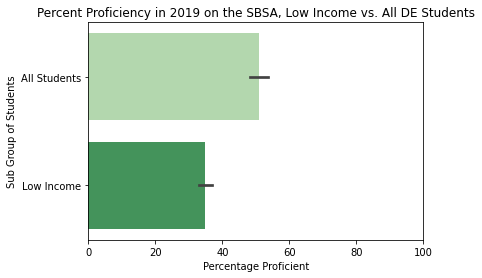

In [25]:
df_low_inc = combined[((combined.SubGroup == 'Low Income') | (combined.SubGroup == 'All Students'))
                      & (combined['Assessment Name'] == 'Smarter Balanced Summative Assessment') 
                      & (combined.RowStatus == 'REPORTED') 
                      & (combined['School Year'] == 2019)]
df = df_low_inc
sns.barplot(y = 'SubGroup',
           x = 'PctProficient',
           data = df,
           palette = 'Greens',
           estimator = np.median).set(xlim=(0,100))
plt.title("Percent Proficiency in 2019 on the SBSA, Low Income vs. All DE Students")
plt.xlabel("Percentage Proficient")
plt.ylabel("Sub Group of Students")
plt.show()

In [29]:
df_all = df[df["SubGroup"] == "All Students"]
df_low = df[df["SubGroup"] == "Low Income"]
test_stat, p = stats.ttest_ind(df_all.PctProficient, df_low.PctProficient)
print("Difference between two independent T's for low income vs. all students: ", test_stat, p, p < 0.05)
print("There is a statistically significant difference between percent proficiency for low income and all students in Delaware.")
print("A randomly selected student from the entire student population is", df_all.PctProficient.mean()/df_low.PctProficient.mean(), "more likely to be proficient on the SBSA than a student from the low-income population.")

Difference between two independent T's for low income vs. all students:  9.604673535469209 1.496920853483063e-20 True
There is a statistically significant difference between percent proficiency for low income and all students in Delaware.
A randomly selected student from the entire student population is 1.3537382901260329 more likely to be proficient on the SBSA than a student from the low-income population.


## Charter Schools and Low-Income

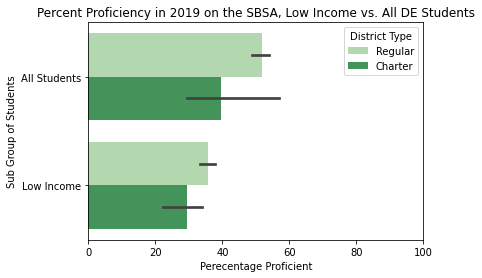

In [31]:
sns.barplot(y = 'SubGroup',
           x = 'PctProficient',
           hue = 'District Type',
           data = df,
           palette = 'Greens',
           estimator = np.median).set(xlim=(0,100))
plt.title("Percent Proficiency in 2019 on the SBSA, Low Income vs. All DE Students")
plt.ylabel("Sub Group of Students")
plt.xlabel("Perecentage Proficient")
plt.show()

In [34]:
df_low_reg = df_low[df_low["District Type"] == "Regular"]
df_low_charter = df_low[df_low["District Type"] == "Charter"]
test_stat, p = stats.ttest_ind(df_low_reg.PctProficient, df_low_charter.PctProficient)
print("Difference between two independent T's for low income students, regular vs. charter: ", test_stat, p, p < 0.05)
print("There is no statistically significant difference in percentage proficient on the SBSA for low income students depending on whether they attend charter or regular school.")

Difference between two independent T's for low income students, regular vs. charter:  1.2057966270561442 0.22875975077464558 False
There is no statistically significant difference in percentage proficient on the SBSA for low income students depending on whether they attend charter or regular school.


While low-income charter school attendees had the lowest amount of percentage proficient, there is no statistical significance for low income students depending on whether they attend a charter or regular school.

## Race

*Note*: Data on Native Americans and Native Hawaiian/Pacific Islanders have been excluded in charter school calculations due to limited data. Some data with counts too low has been redacted to protect the identity of specific students, and that became and issue with trying to work with data for these two groups.

In [44]:
test = 'Smarter Balanced Summative Assessment'
races = ['Hispanic/Latino','African American','White','Asian American',
         'Multi-Racial']
df_race = combined[(combined['Assessment Name'] == test) 
              & (combined['RowStatus'] == 'REPORTED')
              & (combined['SubGroup'].isin(races)) 
              & (combined['School Year'] == 2019)]
df = df_race

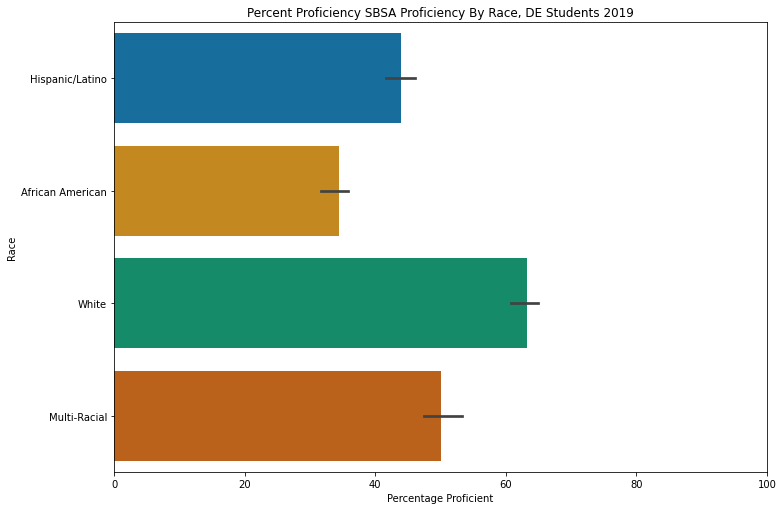

In [53]:
sns.barplot(y = 'Race',
           x = 'PctProficient',
           data = df,
           palette = 'colorblind',
           estimator = np.median).set(xlim=(0,100))
plt.rcParams['figure.figsize'] = 11.7,8.27
plt.title("Percent Proficiency SBSA Proficiency By Race, DE Students 2019")
plt.xlabel("Percentage Proficient")
plt.ylabel("Race")
plt.show()

In [56]:
#Test difference between races on SBSA
hl = df[df.Race == 'Hispanic/Latino']
aa = df[df.Race == 'African American']
w = df[df.Race == 'White']
mr = df[df.Race == "Multi-Racial"]
test_stat, p = stats.f_oneway(hl.PctProficient,aa.PctProficient,w.PctProficient,mr.PctProficient)
print("Racial Comparison on SBSA ", test_stat, p, p < 0.05)
print("White proficiency to African American proficiency odds ratio:", w.PctProficient.mean()/aa.PctProficient.mean())

Racial Comparison on SBSA  151.59986448761728 6.800549340841487e-82 True
White proficiency to African American proficiency odds ratio: 1.73200077556977


By the above ANOVA test, there is a statistically significant difference between different races' percentage proficient on the SBSA in 2019.

White students were 1.732 times more likely to be proficient than African American students.

## Charter Schools and Race

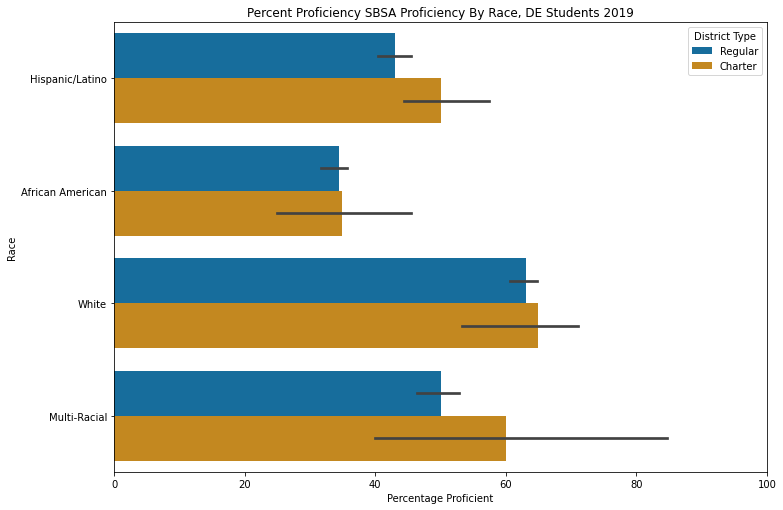

In [57]:
sns.barplot(y = 'Race',
           x = 'PctProficient',
           hue = 'District Type',
           data = df,
           palette = 'colorblind',
           estimator = np.median).set(xlim=(0,100))
plt.title("Percent Proficiency SBSA Proficiency By Race, DE Students 2019")
plt.ylabel("Race")
plt.xlabel("Percentage Proficient")
plt.show()

Interestingly, when we control for race, the 2019 scores actually all showed at least a slightly higher proficiency than regular schools. This may suggest that charter schools have higher percentages of races that are statistically less proficient on scores than regular schools do. Now we will test to see if any of those are statistically significant.

In [61]:
test_stat, p = stats.ttest_ind(hl[hl["District Type"] == 'Regular'].PctProficient, hl[hl["District Type"] == 'Charter'].PctProficient)
print("Difference between two means T-test for Hispanic students, regular vs. charter: ", test_stat, p, p < 0.05)
print("Hispanic/Latino charter to regular proficiency odds ratio:", hl[hl["District Type"] == 'Charter'].PctProficient.mean()/hl[hl["District Type"] == 'Regular'].PctProficient.mean())
print()
test_stat, p = stats.ttest_ind(aa[aa["District Type"] == 'Regular'].PctProficient, aa[aa["District Type"] == 'Charter'].PctProficient)
print("Difference between two means T-test for African American students, regular vs. charter: ", test_stat, p, p < 0.05)
print()
test_stat, p = stats.ttest_ind(w[w["District Type"] == 'Regular'].PctProficient, w[w["District Type"] == 'Charter'].PctProficient)
print("Difference between two means T-test for White students, regular vs. charter: ", test_stat, p, p < 0.05)
print()
test_stat, p = stats.ttest_ind(mr[mr["District Type"] == 'Regular'].PctProficient, mr[mr["District Type"] == 'Charter'].PctProficient)
print("Difference between two means T-test for Multi-Racial students, regular vs. charter: ", test_stat, p, p < 0.05)
print("Multi-Racial charter to regular proficiency odds ratio:", mr[mr["District Type"] == 'Charter'].PctProficient.mean()/mr[mr["District Type"] == 'Regular'].PctProficient.mean())


Difference between two means T-test for Hispanic students, regular vs. charter:  -2.1117618270815472 0.03556205495455925 True
Hispanic/Latino charter to regular proficiency odds ratio: 1.162911046055168

Difference between two means T-test for African American students, regular vs. charter:  -0.35999605777502847 0.7190920940659897 False

Difference between two means T-test for White students, regular vs. charter:  -0.3159038120644893 0.7522887872474029 False

Difference between two means T-test for Multi-Racial students, regular vs. charter:  -2.6726874969384182 0.008329894137246108 True
Multi-Racial charter to regular proficiency odds ratio: 1.2555513158943978


As we can see from the above results, only Hispanic/Latino and Multi-Racial students had a statistically significant difference of proficiency in charter vs. regular schools. Even with this difference, they both had a relatively small effect size, with students being 1.163 and 1.256, respectively, more likely to be proficient when attending a charter school. 

## Conclusions

More than anything, the data reported on here is proof that correlation is not causation. While charter schools seemed to be performing lower overall (without the support of a statistical test), we found at least two racial/ethnic categories where charter schools actually performed better.

While charter schools seem to be able to help some races/ethnic groups, it would be interesting to see why. Is it because of better diversity training available to teachers there? Or is it because these students have parents more prepared to fight for their children's education, rather than accept the standard. What is different about these racial groups that improved, compared to low-income students, who still did worse in charter schools?

Until we better understand the factors that play into students' abilities to succeed at school, our education system will continue to be unfair.

### Works Cited
"Delaware." *National Alliance for Public Charter Schools*, https://www.publiccharters.org/our-work/charter-law-database/states/delaware. Accessed 17 March 2021.

Jason, Zachary. "The Battle Over Charter Schools." *Harvard Ed. Magazine*, President and Fellows of Harvard College, Summer 2017, https://www.gse.harvard.edu/news/ed/17/05/battle-over-charter-schools. Accessed 17 March 2021.

Rothstein, Richard. "The Racial Achievement Gap, Segregated Schools, and Segregated Neighborhoods - A Constitutional Insult." *Economic Policy Institute*, 12 Nov. 2014, [https://www.epi.org/publication/the-racial-achievement-gap-segregated-schools-and-segregated-neighborhoods-a-constitutional-insult/](https://www.epi.org/publication/the-racial-achievement-gap-segregated-schools-and-segregated-neighborhoods-a-constitutional-insult/). Accessed 17 March 2021.